**Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib

In [6]:
# import sys, os
# print("sys.executable =", sys.executable)
# print("sys.version =", sys.version.splitlines()[0])
# print("cwd =", os.getcwd())


sys.executable = c:\Users\ganes\AppData\Local\Programs\Python\Python310\python.exe
sys.version = 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]
cwd = c:\Users\ganes\OneDrive\Desktop\content_monetization_modeler\model


In [ ]:
# import sys

# !{sys.executable} -m pip install --upgrade pip wheel
# !{sys.executable} -m pip install pandas numpy matplotlib seaborn scikit-learn xgboost joblib streamlit


  Using cached pip-25.3-py3-none-any.whl (1.8 MB)
  Using cached wheel-0.45.1-py3-none-any.whl (72 kB)
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached streamlit-1.52.1-py3-none-any.whl.metadata (9.8 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached altair-6.0.0-py3-none-any.whl.metadata (11 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached cachetools-6.2.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached click-8.3.1-py3-none-any.whl.metadata (2.6 kB)
  Using cached protobuf-6.33.2-cp310-abi3-win_amd64.whl.metadata (593 bytes)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached watchdog-6.

In [5]:
df = pd.read_csv('C:\\Users\\ganes\\OneDrive\\Desktop\\content_monetization_modeler\\data\\youtube_ad_revenue_dataset.csv')

df.head()
df.info()
df.describe()
df.isna().mean() * 100
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              122400 non-null  object 
 1   date                  122400 non-null  object 
 2   views                 122400 non-null  int64  
 3   likes                 116283 non-null  float64
 4   comments              116288 non-null  float64
 5   watch_time_minutes    116295 non-null  float64
 6   video_length_minutes  122400 non-null  float64
 7   subscribers           122400 non-null  int64  
 8   category              122400 non-null  object 
 9   device                122400 non-null  object 
 10  country               122400 non-null  object 
 11  ad_revenue_usd        122400 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 11.2+ MB


np.int64(2400)

Data cleaning:

missing values exist in:

1.likes
2.comments
3.watch_time_minutes

In [13]:
#filling numeric missing values with median

num_cols_with_nan = ["likes", "comments", "watch_time_minutes"]

for col in num_cols_with_nan:
  df[col] = df[col].fillna(df[col].median())

Removing duplicates

In [14]:
df = df.drop_duplicates()

Feature Engineering:-

Engagement Rate:

In [15]:
df["engagement_rate"] = (df["likes"] + df["comments"] / df["views"].replace(0,1))

Watch Efficiency:

In [16]:
df["watch_efficiency"] = df["watch_time_minutes"] / df["video_length_minutes"].replace(0,1)

Dropping unwanted columns that do not help the model:

In [17]:
df = df.drop(["video_id", "date"], axis=1)

In [18]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   views                 120000 non-null  int64  
 1   likes                 120000 non-null  float64
 2   comments              120000 non-null  float64
 3   watch_time_minutes    120000 non-null  float64
 4   video_length_minutes  120000 non-null  float64
 5   subscribers           120000 non-null  int64  
 6   category              120000 non-null  object 
 7   device                120000 non-null  object 
 8   country               120000 non-null  object 
 9   ad_revenue_usd        120000 non-null  float64
 10  engagement_rate       120000 non-null  float64
 11  watch_efficiency      120000 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 11.9+ MB


,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd,engagement_rate,watch_efficiency
0,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237,1221.032206,9257.844017
1,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508,642.034541,640.732307
2,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008,1979.018520,2188.216490
3,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261,1191.024118,2662.159087
4,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388,1858.048235,2360.761216


Revenue Distribution:

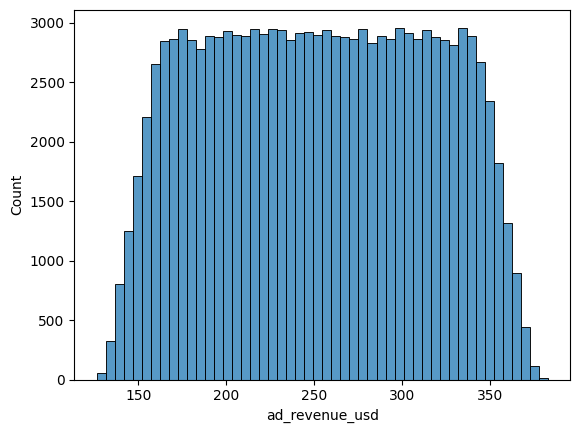

In [19]:
sns.histplot(df["ad_revenue_usd"], bins=50)
plt.show()

Views vs Revenue:

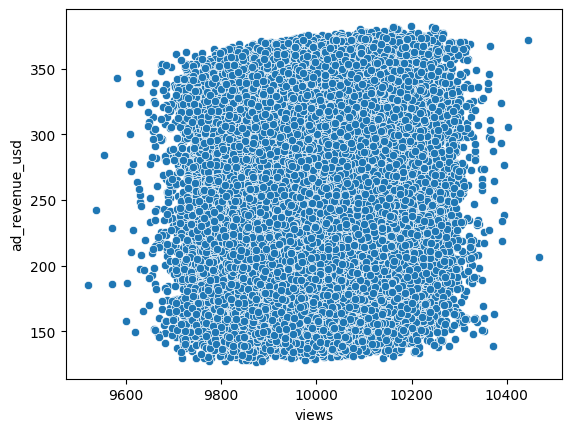

In [20]:
sns.scatterplot(data=df, x="views", y="ad_revenue_usd")

plt.show()

Ok lets see the trend line

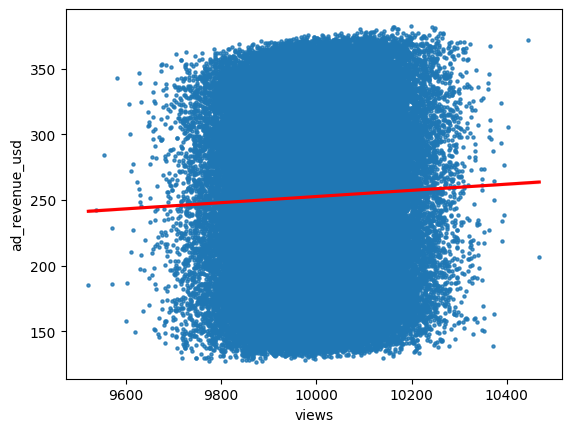

In [21]:
sns.regplot(data=df, x="views", y="ad_revenue_usd", scatter_kws={'s':5}, line_kws={'color':'red'})
plt.show()

Category-wise revenue

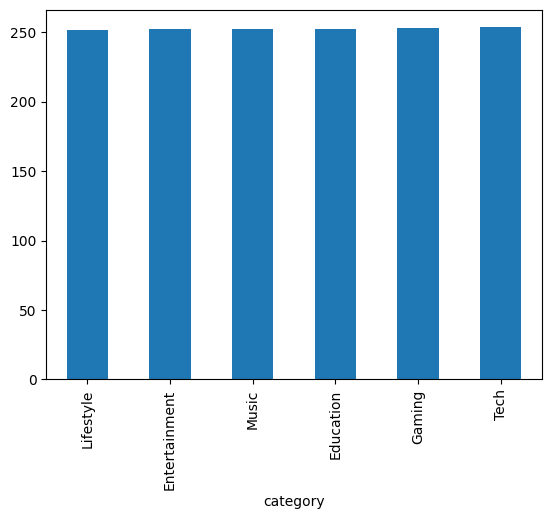

In [22]:
df.groupby("category")["ad_revenue_usd"].mean().sort_values().plot(kind='bar')

plt.show()

Correlation Map:

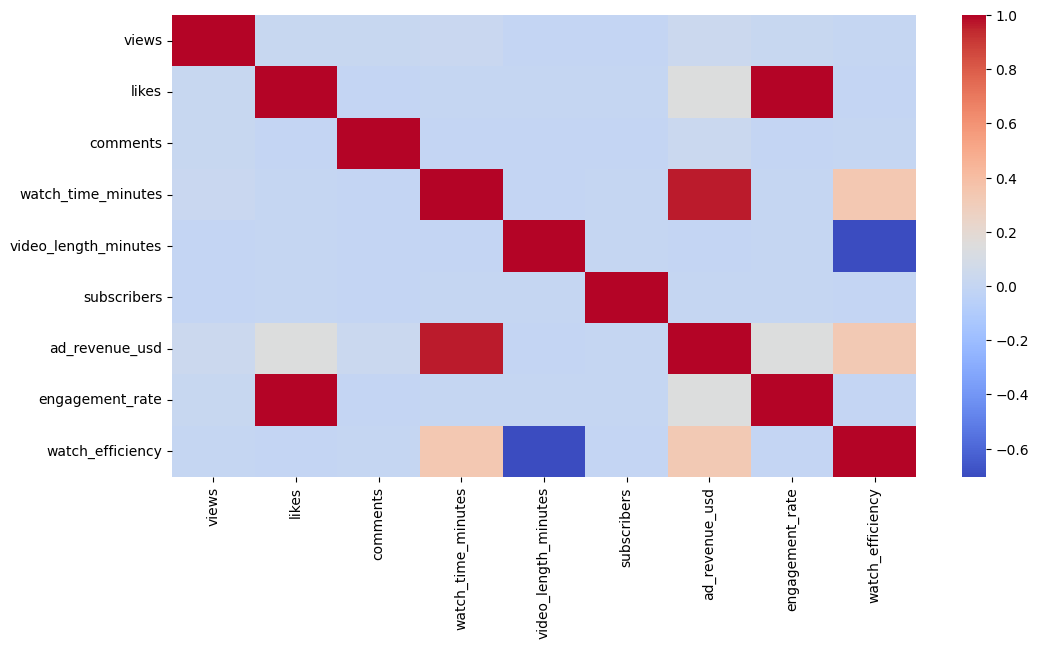

In [24]:
plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes(include=["float64", "int64"]).corr(), cmap="coolwarm")

plt.show()

Features Based on Revenue Correlation:

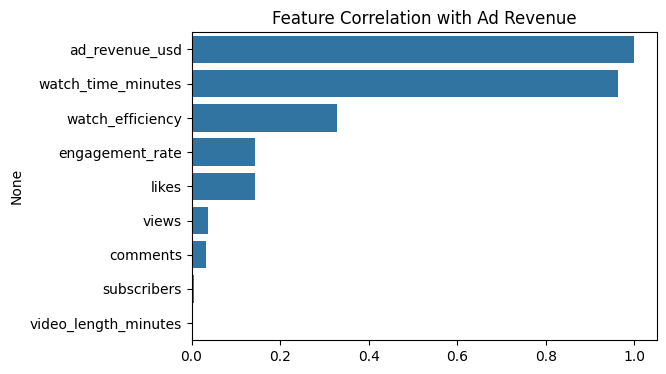

In [26]:
corr = df.select_dtypes(include=["float64", "int64"]).corr()["ad_revenue_usd"].sort_values(ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x=corr.values, y=corr.index)
plt.title("Feature Correlation with Ad Revenue")

plt.show()

Train test split:

In [27]:
X = df.drop("ad_revenue_usd", axis=1)
y = df["ad_revenue_usd"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Preprocessing Pipeline:

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_cols = X_train.select_dtypes(include={"float64", "int64"}).columns
cat_cols = X_train.select_dtypes(include={"object"}).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

Train 5 models: Linear Regression, Ridge, Lasso, Random Forest, XGBoost

In [32]:
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])

    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    results[name] = {
        "R2": r2_score(y_test, preds),
        "RMSE":np.sqrt(mean_squared_error(y_test, preds)),
        "MAE": mean_absolute_error(y_test, preds)
    }


import pandas as pd
pd.DataFrame(results).T

,R2,RMSE,MAE
Linear,0.952580,13.479216,3.111142
Ridge,0.952579,13.479318,3.109190
Lasso,0.952579,13.479335,3.137749
Random Forest,0.949711,13.881020,3.654574
XGBoost,0.951962,13.566738,3.557931


Saving the best model:

In [33]:
best_model = max(results, key=lambda x: results[x]["R2"])
best_model

'Linear'

Training Full Model:

In [34]:
final_model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", models[best_model])
])

final_model.fit(X, y)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Saving it using joblib:

In [35]:
import joblib
joblib.dump(final_model, "yt_revenue_model.pkl")

['yt_revenue_model.pkl']

In [9]:
df = pd.read_csv('C:\\Users\\ganes\\OneDrive\\Desktop\\content_monetization_modeler\\data\\youtube_ad_revenue_dataset.csv')
df["country"].unique()

array(['IN', 'CA', 'UK', 'US', 'DE', 'AU'], dtype=object)